In [65]:
from scipy.special import binom
import pandas as pd
from numpy.random import binomial
import matplotlib.pyplot as plt
import numpy as np

As an example, for n = 4 and k = 2 the binomial coefficient = 6

In [8]:
n = 4
k = 2
binom(n, k)

6.0

We can get all the coefficient by inserting a list of k’s using n = 4. Below we indert this data
into a DataFrame.

In [9]:
n = 4
df_binomial = pd.DataFrame({
    'k': [0, 1, 2, 3, 4]
})
df_binomial['Binomial Coefficient'] = binom(n, df_binomial['k'])
df_binomial

,k,Binomial Coefficient
0,0,1.0
1,1,4.0
2,2,6.0
3,3,4.0
4,4,1.0


<AxesSubplot:xlabel='k'>

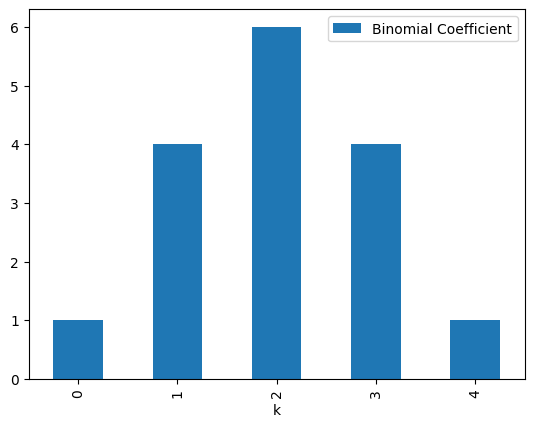

In [12]:
df_binomial.plot.bar('k', 'Binomial Coefficient')

## Flipping a coin for times and counting the heads (p=0.5)

In [18]:
n = 4
p = 0.5
number_of_heads = binomial(4, p)
print(f'{number_of_heads} was head in {n} coin flips (p={p})')

3 was head in 4 coin flips (p=0.5)


We can make the trial several times at once by using the size= input. Here we show the results
of flipping four coins and counting the number of heads. The simulation is performed one
hundered times.

In [19]:
number_of_heads_100 = binomial(n, p, size=100)
print(number_of_heads_100)

[2 3 1 2 2 2 2 3 3 2 2 3 3 1 3 1 2 3 3 0 3 1 1 1 2 2 3 1 2 2 3 3 2 2 0 3 2
 3 0 3 1 2 3 2 3 3 2 2 3 2 2 2 2 3 3 3 1 1 3 3 2 2 1 1 2 3 4 2 2 2 1 0 3 2
 4 2 3 2 1 2 1 2 3 3 3 3 1 1 3 2 2 1 1 3 0 3 2 2 1 3]


Let us make a DataFrame with this information and make a histogram of the number of heads
in the game.

array([[<AxesSubplot:title={'center':'Heads'}>]], dtype=object)

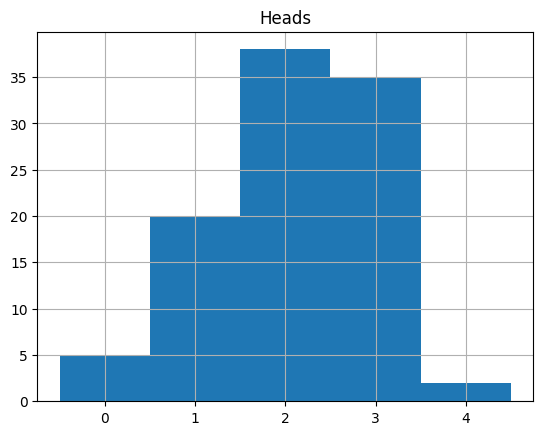

In [20]:
df_coin = pd.DataFrame({
    'Heads': number_of_heads_100
})
df_coin.hist(
    bins=range(6),
    align = 'left'
)

We can use the .value_counts() method to compute the frequency. We use the inputs
sort=False so that the values are not sorted and normalize=True to compute the relative
freqiencies.

In [21]:
df_frequnecy = pd.DataFrame({
    'Simulation' : df_coin['Heads'].value_counts(sort=False, normalize=True)
})
df_frequnecy

,Simulation
2,0.38
3,0.35
1,0.20
0,0.05
4,0.02


Let us see how this compares to the theoretical model discussed above.

In [23]:
n = 4
k = df_frequnecy.index
p = 0.5
df_frequnecy['Theoretical'] = binom(n, k) * p**k * (1-p) ** (n-k)
df_frequnecy

,Simulation,Theoretical
2,0.38,0.3750
3,0.35,0.2500
1,0.20,0.2500
0,0.05,0.0625
4,0.02,0.0625


Let us make plot of the final result.

Text(0.5, 0, 'Number of ones when rolling a dice four times')

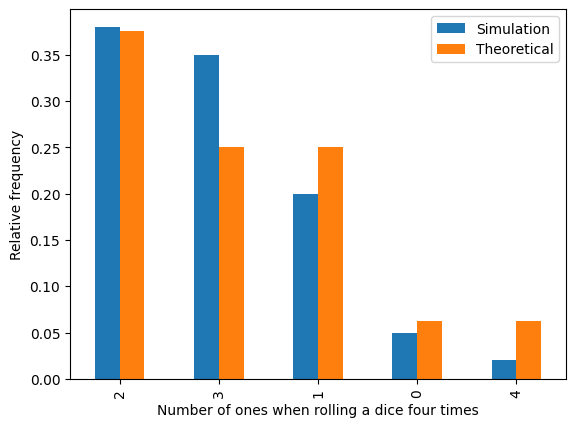

In [25]:
df_frequnecy.plot.bar()
plt.ylabel('Relative frequency')
plt.xlabel('Number of ones when rolling a dice four times')

Since we have a random sample of dice rolles we we see some deviations between the simulated data and the theoreitcal prediction

## 9.4.2 Roll a die

If we role a dice, then the probability is p = 1=6 for rolling a one. Here is a simulation of roling
four dices and then counting the number of ones. The rolls is performed one hundered times.

In [26]:
n = 4
p = 1/6
number_of_ones = binomial(n, p, size=100)
print(number_of_ones)

[0 1 0 0 2 0 1 0 1 3 0 0 0 1 0 0 2 0 2 1 0 1 1 0 1 1 1 1 0 1 1 1 0 2 0 1 1
 1 1 1 2 0 1 1 1 1 0 1 1 0 1 0 2 2 1 1 0 0 0 0 0 1 2 1 0 1 1 0 2 0 2 1 0 0
 1 0 2 1 0 0 0 1 0 0 2 1 3 0 0 0 1 1 1 0 2 0 1 1 0 1]


In [27]:
df_dice = pd.DataFrame({
    'ones': number_of_ones
})
df_dice['ones'].value_counts(sort=False, normalize=True)

0    0.42
1    0.43
2    0.13
3    0.02
Name: ones, dtype: float64

<AxesSubplot:ylabel='Frequency'>

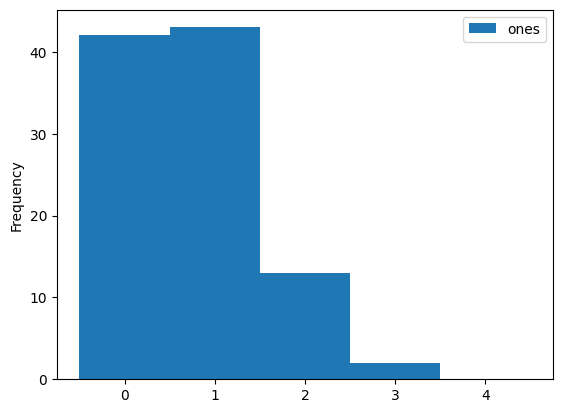

In [28]:
df_dice.plot.hist(
    bins=range(6),
    align = 'left'
)

## Exercise 9.6: The distribution of dice rolls
The main text showed how we could use Python to simulate rolling a dice four times.
1. Make your own Jupyter Notebook with the simulation of rolling a dice four times
with N = 100 (the same as done in the text).

In [40]:
n = 4
p = 1/6
four_dices_rolled_100_times = binomial(n, p, size=100)
four_dices_rolled_100_times

array([0, 1, 0, 1, 1, 3, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3, 1, 1, 1, 3,
       1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1,
       0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0])

d

array([[<AxesSubplot:title={'center':'Heads'}>]], dtype=object)

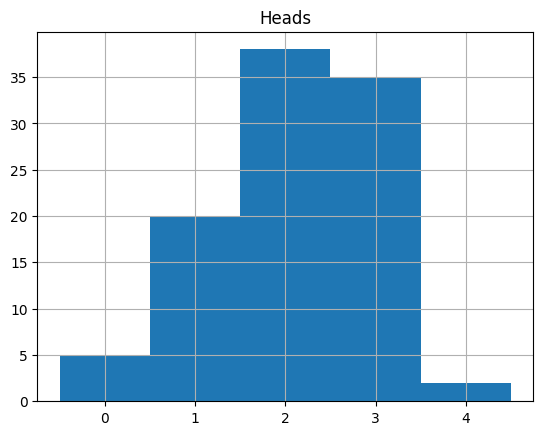

In [47]:
df_coin_ones = pd.DataFrame({
    'Ones': four_dices_rolled_100_times
})

df_coin.hist(
    bins=range(6),
    align='left'
)

In [52]:
df_coin_frequency = pd.DataFrame({
    'Simulation': df_coin_ones['Ones'].value_counts(sort=False, normalize=True)
    })
df_coin_frequency

,Simulation
0,0.46
1,0.37
3,0.03
2,0.14


In [53]:
# Compare it to the theoretical model
n = 4
k = df_coin_frequency.index
p = 1/6
df_coin_frequency['Theoretical'] = binom(n, k) * p ** k * (1-p) ** (n-k)

In [54]:
df_coin_frequency

,Simulation,Theoretical
0,0.46,0.482253
1,0.37,0.385802
3,0.03,0.015432
2,0.14,0.115741


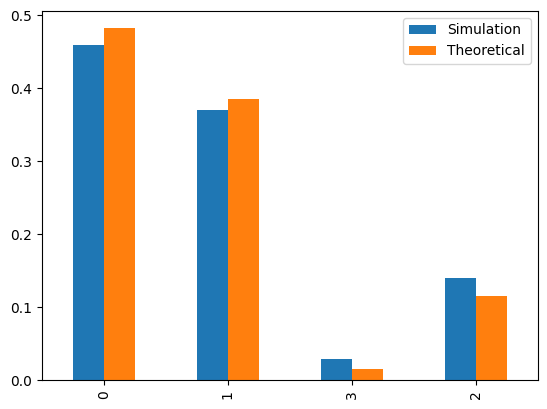

In [58]:
df_coin_frequency.plot.bar()
plt.ylabel('Relative Frequency')
plt.xlabel('Number of ones when rolling the dice four times')

## Exercise 9.7: Yatzy role using Python*
(Optional) Five dices are rolled in the first round of a Yatzy game. The best role of the
game is where all dices show a six. In this exercise, we will investigate the probability of
such a lucky roll. First, we will make a simulations that mimics how we would estimate
this from empirical data. Last, we will compare the results to the theoretical prediction
utilizing the binomial distribution.
1. Use Python to simulate N =1 000 000 (one million) Yatzy roles where the number
of sixes is counted in each role. Hint: See page 140 where we used Python to
simulate dice rolls of a Yatzy game.


In [72]:
n = 6
p = 1/6
numberOfSixesInYatzy = binomial(n,p,size=100000000)
dfYatzySixes = pd.DataFrame({
    'Sixes': numberOfSixesInYatzy
})
dfYatzySixes

,Sixes
0,2
1,2
2,1
3,3
4,0
...,...
99999995,1
99999996,1
99999997,0
99999998,1


2. Plot the histogram of number of sixes in each game.

Text(0.5, 0, 'Number of sixes')

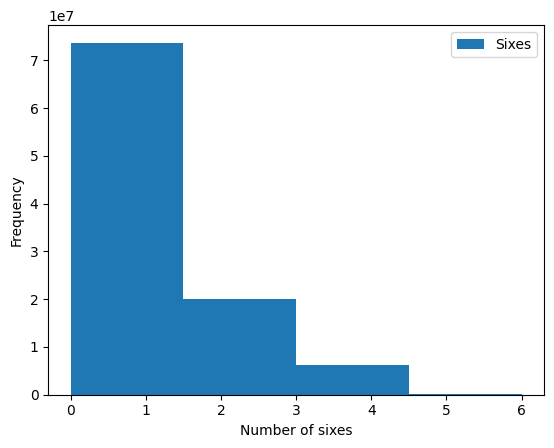

In [73]:
dfYatzySixes.plot.hist(bins = 4)
plt.xlabel('Number of sixes')

3. How many times are all dices sixes in your simulation. What is your best estimate
of the probability of rolling six sixes in the first role (using your simulated data).


In [75]:
dfYatzySixes['Sixes'].value_counts(6)

1    0.401866
0    0.334923
2    0.200903
3    0.053593
4    0.008051
5    0.000642
6    0.000022
Name: Sixes, dtype: float64

In [ ]:
4. Plot the theoretical distribution of the number of sixes in each game. Hint: See
how the binomial probabilities was computed for coin flips on page 151.
5. What is the theoretical prediction for the probability to roll all sixes in a Yatzy
roll.